## Check the data

In [2]:
from sklearn.datasets import fetch_20newsgroups
# Refer to the offcial document of scikit-learn for detailed usages:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
twenty_train = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [3]:
print(type(twenty_train))
print(twenty_train.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
twenty_train.filenames

array(['/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51861',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51879',
       ...,
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319',
       '/Users/apple/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104440'],
      dtype='<U93')

In [5]:
twenty_train.target

array([7, 4, 4, ..., 3, 1, 8])

In [6]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
len(twenty_train.target_names)

20

In [8]:
import numpy as np
np.unique(twenty_train.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [9]:
print(twenty_train.target[1])
print(twenty_train.data[1])

4
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [10]:
# The first document belongs to the category 'comp.sys.mac.hardware'
print(twenty_train.target_names[twenty_train.target[0]])

rec.autos


In [11]:
print(len(twenty_train.data))
print(len(twenty_train.target))

11314
11314



## Question 1:
To get started, plot a histogram of the number of training documents for each of the 20 categories to check if they are evenly distributed.

In [12]:
num_each_category = [0]*20
lenth = len(twenty_train.target)
for target in twenty_train.target:
    num_each_category[target] += 1
print(num_each_category)

[480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591, 594, 593, 599, 546, 564, 465, 377]


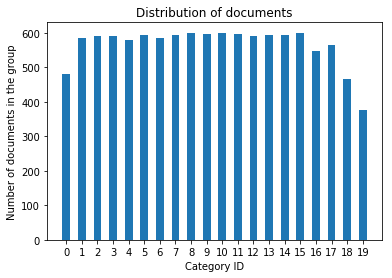

In [14]:
from matplotlib import pyplot as plt
t = range(0,20)
plt.bar(t,num_each_category,0.5)
plt.xticks(t,t)
plt.title("Distribution of documents")
plt.xlabel("Category ID")
plt.ylabel("Number of documents in the group")
plt.show()

## Question 2: 
Use the following specs to extract features from the textual data:
- Use the “english” stopwords of the CountVectorizer
- Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.) 
- Perform lemmatization with nltk.stem.wordnet.WordNetLemmatizer and pos_tag 
- Use min_df=3 

Report the shape of the TF-IDF matrices of the train and test subsets respectively

In [15]:
import numpy as np
np.random.seed(42)

import random
random.seed(42)

In [16]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
            'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)

In [17]:
print(np.unique(train_dataset.target))
print(train_dataset.target_names)
print(len(train_dataset.target))
print(len(test_dataset.target))
print(type(train_dataset.target))

[0 1 2 3 4 5 6 7]
['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
4732
3150
<class 'numpy.ndarray'>


In [21]:
# Lemmatization
from nltk import pos_tag,word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer

wnl = WordNetLemmatizer()

stop_words = ENGLISH_STOP_WORDS

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

# remove nums as well as stop words
def stem_rmv_nums(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in stop_words and not word.isdigit())

analyzer = CountVectorizer().build_analyzer()
vectorizer = CountVectorizer(min_df=3, analyzer=stem_rmv_nums) # we have removed stopwords when removing nums

print(vectorizer)
print('-' * 20)
X_train = vectorizer.fit_transform(train_dataset.data)
print(X_train.shape)
print('-' * 20)
print(len(vectorizer.get_feature_names()))
print('-' * 20)
print(vectorizer.get_feature_names()[:100])

CountVectorizer(analyzer=<function stem_rmv_nums at 0x11284a400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)
--------------------
(4732, 16319)
--------------------
16319
--------------------
['0005111312na1em', '0010580b', '002251w', '0096b0f0', '00bjgood', '00mbstultz', '00pm', '02uv', '03hz', '03k', '05apr93', '05l', '06eh', '06paul', '0_', '0___', '0a', '0b', '0b14', '0c', '0d', '0d2', '0df', '0e', '0ek', '0f', '0g', '0g8', '0h', '0hd', '0i', '0iv', '0ivbudk', '0j', '0k', '0l', '0m', '0m75u', '0m8b', '0mk', '0n', '0o', '0p', '0q', '0qax', '0qq', '0r', '0sl', '0t', '0tbxn', '0tbxom', '0tq', '0tq6', '0u', '0v', '0va', '0w', '0x', '0x100', '0y', '0z', '1000cc', '100k', '100mph', '101e', '102

In [22]:
# test data

X_test = vectorizer.transform(test_dataset.data)
print(X_test.shape)

(3150, 16319)


In [24]:
# TF-IDF matrices of the train subsets
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

print(tfidf)
print('-' * 20)

X_train_tfidf = tfidf.fit_transform(X_train)
print(X_train_tfidf.shape)
print('-' * 20)
print(X_train.toarray()[20:30,20:30])
print('-' * 20)
print(X_train_tfidf.toarray()[20:30,20:30])

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
--------------------
(4732, 16319)
--------------------
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
# TF-IDF matrices of the test subsets

X_test_tfidf = tfidf.transform(X_test)
print(X_test_tfidf.shape)
print('-' * 20)
print(X_test.toarray()[20:30,20:30])
print('-' * 20)
print(X_test_tfidf.toarray()[20:30,20:30])

(3150, 16319)
--------------------
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Question 3:
Reduce the dimensionality of the data using the methods above
- Apply LSI to the TF-IDF matrix corresponding to the 8 categories with k = 50; so each document is mapped to a 50-dimensional vector.
- Also reduce dimnsionality through NMF (k = 50) and compare with LSI: 
<br>Which one is larger, the $ \mid\mid X-WH\mid\mid_F^2 $ in NMF or the $\mid\mid X-U_k\sum_kV_k^T\mid\mid_F^2$ in LSI? Why is the case?

In [26]:
# LSI
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 50, random_state = 42)
X_train_lsi = svd.fit_transform(X_train_tfidf)
X_test_lsi = svd.transform(X_test_tfidf)

# show time
print(X_train_lsi.shape)
print(X_train_lsi)

(4732, 50)
[[ 0.13264864  0.0996511   0.02809409 ... -0.01471573  0.03555587
   0.00890533]
 [ 0.12492937  0.12831517  0.0373239  ...  0.27479684 -0.15601885
   0.04450578]
 [ 0.18184614 -0.02649614  0.00257884 ...  0.00289785  0.03281254
   0.01577702]
 ...
 [ 0.14001711  0.113792    0.02665245 ...  0.02799442 -0.01186747
  -0.00182857]
 [ 0.21163627  0.15900119  0.02883639 ...  0.03833902  0.00435591
  -0.0109685 ]
 [ 0.11851532 -0.02439784 -0.04525538 ...  0.02404043  0.02482595
   0.01249345]]


In [27]:
# NMF
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, init='random', random_state=42)
W_train = nmf.fit_transform(X_train_tfidf)
W_test = nmf.transform(X_test_tfidf)

H = nmf.components_

# show time
print(W_train.shape)
print('-' * 20, 'NMF', '-'*20)
print(W_train)
print('-' * 20, 'NMF', '-'*20)
print(W_train.shape)
print(H.shape)

(4732, 50)
-------------------- NMF --------------------
[[0.09231654 0.05966702 0.         ... 0.00453938 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.01386315 0.         0.00745838 ... 0.00207688 0.         0.        ]
 ...
 [0.02440786 0.14556696 0.         ... 0.         0.         0.        ]
 [0.16921084 0.         0.         ... 0.         0.         0.00091498]
 [0.         0.         0.         ... 0.         0.00398401 0.00224543]]
-------------------- NMF --------------------
(4732, 50)
(50, 16319)


In [28]:
# Loss of nmf


#err_nmf = nmf.reconstruction_err_
err_nmf = np.sum(np.array(X_train_tfidf - W_train.dot(H)) ** 2)

print(err_nmf)

4141.549653993933


In [29]:
# Loss of lsi

SIGMA_V = svd.components_
err_lsi = np.sum(np.array(X_train_tfidf - X_train_lsi.dot(SIGMA_V)) ** 2)

print(err_lsi)

4106.962861236307


In [30]:
print('The loss of LSI method is: ',err_lsi)
print('The loss of NMF method is: ',err_nmf)

if err_lsi > err_nmf:
    print('So the loss of LSI is larger!')
elif err_lsi < err_nmf:
    print('So the loss of NMF is larger!')
else:
    print('Incredible!!! They are equal!')

The loss of LSI method is:  4106.962861236307
The loss of NMF method is:  4141.549653993933
So the loss of NMF is larger!


## Question 4:
Hard margin and soft margin linear SVMs:
- Train two linear SVMs and compare:
    * Train one SVM with $\gamma = 1000$ (hard margin), another with $\gamma = 0.0001$ (soft nargin).
    * Plot the ROC curve, report the **confusion matrix** and calculate the **accuracy, recall, precision** and **F-1 score** of both SVM classifier. Which one performs better?
    * What happens for the soft margin SVM? Why is the case?
        - Does the DOC curve of the soft margin SVM look good? Does this conflict with other metrics?
- Use cross-validation to choose $\gamma$ (use average validation accuuracy to compare):
<br>Using a 5-fold cross-validation, find the best value of the parameter $\gamma$ in the range $\lbrace10^k\mid-3\leq k\leq3, k\in\mathbb Z\rbrace$. Again, plot the ROC curve and report the confusion matrix and calculate the **accuracy, recall precision** and **F-1 score** of this best SVM.

### Train SVM and Compare

In [31]:
# data preparation and regroup

# regroup
def get_labels(dataset):
    labels = []
    new_name = ['Computer Technology','Recreational Activity']

    for label in dataset.target:
        name = dataset.target_names[label]
        if name.startswith('comp'):
            labels.append(0)
        elif name.startswith('rec'):
            labels.append(1)
        else:
            print('Wrong type!')
    
    return labels, new_name

train_label, new_name = get_labels(train_dataset)
test_label, _ = get_labels(test_dataset)

# check
print('-'*20,'train_dataset','-'*20)
print(len(train_label))
print(np.unique(train_label))
print('-'*20,'test_dataset','-'*20)
print(len(test_label))
print(np.unique(test_label))

-------------------- train_dataset --------------------
4732
[0 1]
-------------------- test_dataset --------------------
3150
[0 1]


In [34]:
# train linear SVMs
from sklearn.svm import SVC

svm_hard = SVC(kernel='linear', C=1000, random_state=42).fit(X_train_lsi, train_label)
svm_soft = SVC(kernel='linear', C=0.0001, random_state=42).fit(X_train_lsi, train_label)

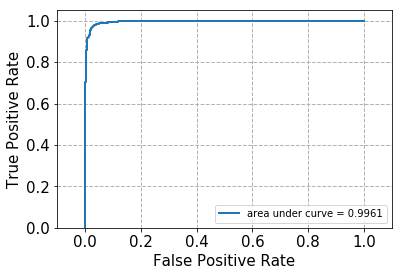

In [36]:
# define plot drawing
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=2,label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
# prepare plot for svm_hard

score_hard = svm_hard.decision_function(X_test_lsi)
#print(len(score_hard))
fpr_hard, tpr_hard, _ = metrics.roc_curve(test_label, score_hard)

# draw the ROC for svm_hard

plot_roc(fpr_hard, tpr_hard)

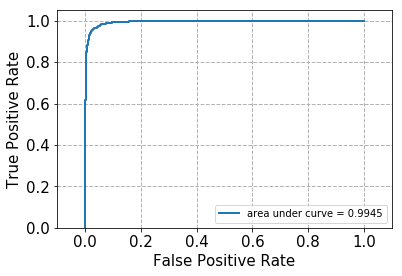

In [37]:
# plot for svm_soft

score_soft = svm_soft.decision_function(X_test_lsi)
fpr_soft, tpr_soft, _ = metrics.roc_curve(test_label, score_soft)

# draw the ROC for svm_soft

plot_roc(fpr_soft, tpr_soft)

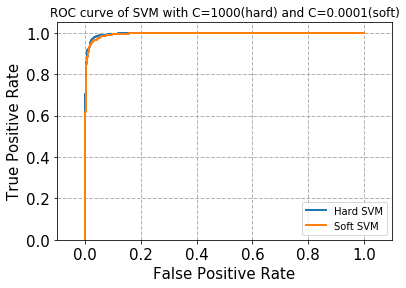

In [38]:
fig, ax = plt.subplots()

line_hard = ax.plot(fpr_hard, tpr_hard, linewidth=2)
line_soft = ax.plot(fpr_soft, tpr_soft, linewidth=2)

ax.grid(color='0.7', linestyle='--', linewidth=1)

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)

ax.legend(('Hard SVM','Soft SVM'),loc="lower right")
plt.title('ROC curve of SVM with C=1000(hard) and C=0.0001(soft)')

for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)

In [63]:
# Confusion Matrix & other metrics
def evaluate(classifier, clf_name, testSet, label, average=''):
    y_pred = classifier.predict(testSet)
    CM = metrics.confusion_matrix(label, y_pred)
    
    print('-'*20, 'Confusion Matrix of', clf_name, '-'*20)
    print(CM)
    
    accuracy = metrics.accuracy_score(label, y_pred)
    if average == '':
        recall = metrics.recall_score(label, y_pred)
        precision = metrics.precision_score(label, y_pred)
        Fscore = metrics.f1_score(label, y_pred)
    else:
        recall = metrics.recall_score(label,y_pred,average=average)
        precision = metrics.precision_score(label, y_pred,average=average)
        Fscore = metrics.f1_score(label, y_pred,average=average)
    
    print('-'*20, 'Other Evaluation of', clf_name, '-'*20)
    print('Accuracy:', accuracy)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F-1 Score:', Fscore)

evaluate(svm_hard, 'hard SVM(C=1000)', X_test_lsi, test_label)
print()
evaluate(svm_soft, 'soft SVM(C=0.0001)', X_test_lsi, test_label)

print()
print('-'*20,'Notes of Index','-'*20)
print('labels are:')
print('Value of 0 ->',new_name[0])
print('Value of 1 ->',new_name[1])

-------------------- Confusion Matrix of hard SVM(C=1000) --------------------
[[1504   56]
 [  35 1555]]
-------------------- Other Evaluation of hard SVM(C=1000) --------------------
Accuracy: 0.9711111111111111
Recall: 0.9779874213836478
Precision: 0.9652389819987586
F-1 Score: 0.9715713839425181

-------------------- Confusion Matrix of soft SVM(C=0.0001) --------------------
[[   0 1560]
 [   0 1590]]
-------------------- Other Evaluation of soft SVM(C=0.0001) --------------------
Accuracy: 0.5047619047619047
Recall: 1.0
Precision: 0.5047619047619047
F-1 Score: 0.6708860759493671

-------------------- Notes of Index --------------------
labels are:
Value of 0 -> Computer Technology
Value of 1 -> Recreational Activity


### Use cross-validation to choose $\gamma$

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

def cross_validate(classifier, train, label):
    avg_score = []

    for k in range(-3, 4):
        classifier.set_params(C=10**k).fit(train, label)
        cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
        scores = cross_val_score(classifier, train, label, cv=cv, scoring='accuracy')
    
        print('-'*20,'C =',10**k,'-'*20)
        print(scores)
        print(np.average(scores))
        avg_score.append(np.average(scores))

    max_score = np.max(avg_score)
    index = avg_score.index(max_score)
    c_idx = [x for x in range(-3,4)][index]
    print('-'*20,'Result','-'*20)
    print('The best classifier is when C =', 10**c_idx)
    print('Average Accuracy is:', max_score)
    
    return classifier.set_params(C=10**c_idx).fit(train,label)

svm_best = cross_validate(SVC(kernel='linear'), X_train_lsi, train_label)

-------------------- C = 0.001 --------------------
[0.49295775 0.50633803 0.48098592 0.50985915 0.48309859]
0.4946478873239437
-------------------- C = 0.01 --------------------
[0.49295775 0.50633803 0.48169014 0.50985915 0.48380282]
0.4949295774647887
-------------------- C = 0.1 --------------------
[0.96267606 0.96056338 0.97112676 0.96690141 0.95985915]
0.9642253521126761
-------------------- C = 1 --------------------
[0.97042254 0.96478873 0.97464789 0.97112676 0.96760563]
0.969718309859155
-------------------- C = 10 --------------------
[0.97253521 0.96830986 0.97464789 0.97535211 0.96830986]
0.971830985915493
-------------------- C = 100 --------------------
[0.97183099 0.96971831 0.97042254 0.97323944 0.96830986]
0.9707042253521129
-------------------- C = 1000 --------------------
[0.97112676 0.96901408 0.97112676 0.97394366 0.96760563]
0.9705633802816902
-------------------- Result --------------------
The best classifier is when C = 10
Average Accuracy is: 0.971830985915

**$\therefore$ the best $\gamma$ for SVM is 10**

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


Text(0.5, 1.0, 'ROC Curve of the best SVM')

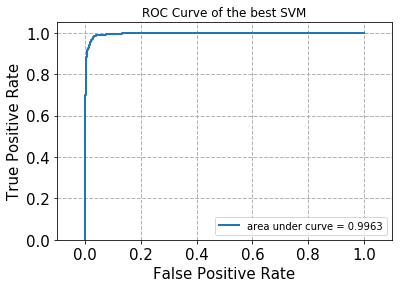

In [41]:
# ROC curve of the best

print(svm_best)

score = svm_best.decision_function(X_test_lsi)
fpr, tpr, _ = metrics.roc_curve(test_label, score)

plot_roc(fpr, tpr)
plt.title('ROC Curve of the best SVM')

In [42]:
# Confusion Matrix of the best SVM and other metrics
evaluate(svm_best, 'best SVM(C=10)', X_test_lsi, test_label)

-------------------- Confusion Matrix of best SVM(C=10) --------------------
[[1512   48]
 [  30 1560]]
-------------------- Other Evaluation of best SVM(C=10) --------------------
Accuracy: 0.9752380952380952
Recall: 0.9811320754716981
Precision: 0.9701492537313433
F-1 Score: 0.975609756097561


## Question 5:
Logistic classifier:
- Train a logistic classifier without regularization (you may need to come up with some way to approximate this if you use sklearn.linear_model.LogisticRegression); plot the ROC curve and report the confusion matrix and calculate the **accuracy, recall precision** and **F-1 score** of this classifier.
- Regularization:
    * Using 5-fold cross-validation on the dimension-reduced-by-svd training data, find the best regularization strength in the range $\lbrace10^k\mid -3 \leq k \leq 3, k \in \mathbb Z\rbrace$ for logistic regression with L1 regularization and logistic regression L2 regularization, respectively.
    * Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers: w/o regularization, w/L1 regularization and w/L2 regularization (with the best parameters you found from the part above), using test data.
    * How does the regularization parameter affect the test error? How are the learnt coefficients affected? Why might one be interested in each type of regularization?
    * Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what's the difference between their ways to find this boundary?
    <br>Why their performance differ?

### Train a logistic classifier without regularization

In [43]:
from sklearn.linear_model import LogisticRegression
lr_nonReg = LogisticRegression(C=float(10**6), solver='liblinear', random_state=42).fit(X_train_lsi, train_label)

Text(0.5, 1.0, 'ROC Curve of Logistic Regression without Regularization')

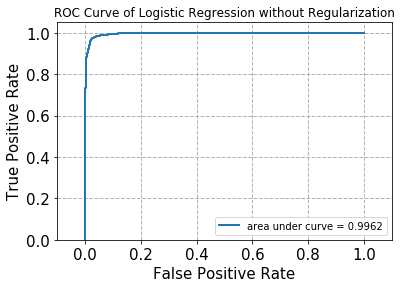

In [44]:
# plot ROC curve
score_nonReg = lr_nonReg.decision_function(X_test_lsi)
fpr_nonReg, tpr_nonReg, _ = metrics.roc_curve(test_label, score_nonReg)

plot_roc(fpr_nonReg, tpr_nonReg)
plt.title('ROC Curve of Logistic Regression without Regularization')

In [45]:
# Confusion Matrix and other metrics of Logistic Regression without regularization 
evaluate(lr_nonReg, 'Logistic Regression without Regularization', X_test_lsi, test_label)

print()
print('-'*20,'Notes of Index','-'*20)
print('labels are:')
print('Value of 0 ->',new_name[0])
print('Value of 1 ->',new_name[1])

-------------------- Confusion Matrix of Logistic Regression without Regularization --------------------
[[1507   53]
 [  32 1558]]
-------------------- Other Evaluation of Logistic Regression without Regularization --------------------
Accuracy: 0.973015873015873
Recall: 0.979874213836478
Precision: 0.9671011793916822
F-1 Score: 0.9734457981880662

-------------------- Notes of Index --------------------
labels are:
Value of 0 -> Computer Technology
Value of 1 -> Recreational Activity


### Logistic Regression with Regularization

#### Using 5-fold cross-validation to optimize the regularization strength

In [46]:
# L1 regularization
lr_L1 = cross_validate(LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
                        X_train_lsi, train_label)

-------------------- C = 0.001 --------------------
[0.50704225 0.49366197 0.48098592 0.49014085 0.51690141]
0.4977464788732394
-------------------- C = 0.01 --------------------
[0.50704225 0.49366197 0.48098592 0.49014085 0.51690141]
0.4977464788732394
-------------------- C = 0.1 --------------------
[0.95915493 0.9528169  0.96126761 0.95633803 0.95422535]
0.9567605633802817
-------------------- C = 1 --------------------
[0.96619718 0.96197183 0.96901408 0.96760563 0.96338028]
0.9656338028169014
-------------------- C = 10 --------------------
[0.97464789 0.97394366 0.97535211 0.97464789 0.97183099]
0.9740845070422536
-------------------- C = 100 --------------------
[0.97253521 0.97183099 0.97394366 0.97394366 0.97253521]
0.9729577464788732
-------------------- C = 1000 --------------------
[0.97253521 0.97183099 0.97394366 0.97323944 0.97253521]
0.9728169014084507
-------------------- Result --------------------
The best classifier is when C = 10
Average Accuracy is: 0.9740845070

#### $\therefore$ The best inverse of regularization strength for L1 is 10

In [47]:
# L2 regularization
lr_L2 = cross_validate(LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
                        X_train_lsi, train_label)

-------------------- C = 0.001 --------------------
[0.50492958 0.69788732 0.93873239 0.83028169 0.48380282]
0.6911267605633803
-------------------- C = 0.01 --------------------
[0.87957746 0.93521127 0.97112676 0.95422535 0.80140845]
0.9083098591549295
-------------------- C = 0.1 --------------------
[0.96478873 0.96126761 0.97183099 0.96901408 0.95140845]
0.9636619718309859
-------------------- C = 1 --------------------
[0.96971831 0.96478873 0.97464789 0.97042254 0.96478873]
0.9688732394366196
-------------------- C = 10 --------------------
[0.97323944 0.96830986 0.97676056 0.97323944 0.96901408]
0.9721126760563379
-------------------- C = 100 --------------------
[0.97535211 0.97183099 0.97535211 0.97183099 0.97394366]
0.973661971830986
-------------------- C = 1000 --------------------
[0.97253521 0.97183099 0.97394366 0.97323944 0.97323944]
0.9729577464788732
-------------------- Result --------------------
The best classifier is when C = 100
Average Accuracy is: 0.9736619718

#### $\therefore$ The best inverse of regularization strength for L2 is 100

#### Compare 3 classifiers

In [48]:
# For test data, compare their performance

y_pred_nonReg = lr_nonReg.predict(X_test_lsi)
y_pred_L1 = lr_L1.predict(X_test_lsi)
y_pred_L2 = lr_L2.predict(X_test_lsi)

accuracy_nonReg = metrics.accuracy_score(test_label, y_pred_nonReg)
accuracy_L1 = metrics.accuracy_score(test_label, y_pred_L1)
accuracy_L2 = metrics.accuracy_score(test_label, y_pred_L2)

recall_nonReg = metrics.recall_score(test_label, y_pred_nonReg)
recall_L1 = metrics.recall_score(test_label, y_pred_L1)
recall_L2 = metrics.recall_score(test_label, y_pred_L2)

precision_nonReg = metrics.precision_score(test_label, y_pred_nonReg)
precision_L1 = metrics.precision_score(test_label, y_pred_L1)
precision_L2 = metrics.precision_score(test_label, y_pred_L2)

Fscore_nonReg = metrics.f1_score(test_label, y_pred_nonReg)
Fscore_L1 = metrics.f1_score(test_label, y_pred_L1)
Fscore_L2 = metrics.f1_score(test_label, y_pred_L2)

# show time

print('-'*20, 'Logistic Regression with w/o regularization','-'*20)
print('Accuracy:',accuracy_nonReg)
print('Recall:',recall_nonReg)
print('Precision:',precision_nonReg)
print('F-1 Score:',Fscore_nonReg)

print('-'*20, 'Logistic Regression with w/L1 regularization','-'*20)
print('Accuracy:',accuracy_L1)
print('Recall:',recall_L1)
print('Precision:',precision_L1)
print('F-1 Score:',Fscore_L1)

print('-'*20, 'Logistic Regression with w/L2 regularization','-'*20)
print('Accuracy:',accuracy_L2)
print('Recall:',recall_L2)
print('Precision:',precision_L2)
print('F-1 Score:',Fscore_L2)

-------------------- Logistic Regression with w/o regularization --------------------
Accuracy: 0.973015873015873
Recall: 0.979874213836478
Precision: 0.9671011793916822
F-1 Score: 0.9734457981880662
-------------------- Logistic Regression with w/L1 regularization --------------------
Accuracy: 0.9720634920634921
Recall: 0.979874213836478
Precision: 0.9653035935563816
F-1 Score: 0.9725343320848939
-------------------- Logistic Regression with w/L2 regularization --------------------
Accuracy: 0.9733333333333334
Recall: 0.9811320754716981
Precision: 0.966542750929368
F-1 Score: 0.9737827715355806


In [50]:
# Confusion Matrix 

CM_nonReg = metrics.confusion_matrix(test_label, y_pred_nonReg)
CM_L1 = metrics.confusion_matrix(test_label, y_pred_L1)
CM_L2 = metrics.confusion_matrix(test_label, y_pred_L2)

# show time
print('-'*20, 'Confusion Matrix of w/o regularization','-'*20)
print(CM_nonReg)
print('-'*20, 'Confusion Matrix of w/L1 regularization','-'*20)
print(CM_L1)
print('-'*20, 'Confusion Matrix of w/L2 regularization','-'*20)
print(CM_L2)
print('-'*20, 'Notes of Index','-'*20)
print('labels are:')
print('Value of 0 ->',new_name[0])
print('Value of 1 ->',new_name[1])

-------------------- Confusion Matrix of w/o regularization --------------------
[[1507   53]
 [  32 1558]]
-------------------- Confusion Matrix of w/L1 regularization --------------------
[[1504   56]
 [  32 1558]]
-------------------- Confusion Matrix of w/L2 regularization --------------------
[[1506   54]
 [  30 1560]]
-------------------- Notes of Index --------------------
labels are:
Value of 0 -> Computer Technology
Value of 1 -> Recreational Activity


In [52]:
# Learnt coefficients
print('-'*20, 'Coefficients of w/o regularization','-'*20)
print(lr_nonReg.coef_)
print('-'*20, 'Coefficients of w/L1 regularization','-'*20)
print(lr_L1.coef_)
print('-'*20, 'Coefficients of w/L2 regularization','-'*20)
print(lr_L2.coef_)

-------------------- Coefficients of w/o regularization --------------------
[[ -4.82227468 124.04432871 -25.16035881  91.53510578  14.6348396
  -17.44440009  -3.434508     1.51007109  24.0498891   18.3969862
   33.45209612  -4.58073603 -12.29631953  11.73037924 -16.70782175
   -2.57166256 -10.72619183  13.46550213  16.53555859   3.34556521
   -0.89393895  -1.28185099  -4.37428383   5.91357888  10.01942029
   -3.52488137  16.88711953  -6.90756099 -12.79918896  21.17840376
    1.47271195 -10.74987683  11.59541362  -4.45628672  -7.27049459
    1.64818731  10.14868016 -11.84525038   3.75176382   8.47487332
    6.4412368   15.76628075 -11.60271396   3.92011692   2.62737915
   -5.56168779 -11.21385135   4.0024145    7.98094118  -5.18590256]]
-------------------- Coefficients of w/L1 regularization --------------------
[[ -2.04715848 106.2594828  -18.1330126   73.90277308  11.4063873
  -11.25435226  -1.64745972   0.          18.07938578  15.31649281
   27.28744345  -4.02875985  -9.33645304  

## Question 6:
Naive  Bayes classifier: Train a GaussianNB classifier; plot the ROC curve and report the confusion matrix and calculate the **accuracy, recall, precision** and **F-1 score** of this classifier.

In [53]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB().fit(X_train_lsi, train_label)

Text(0.5, 1.0, 'ROC Curve of GaussianNB')

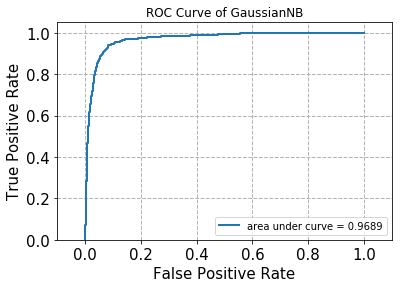

In [54]:
# ROC curve for GaussianNB
score_bayes = bayes.predict_proba(X_test_lsi)[:,1]
fpr_bayes, tpr_bayes, _ = metrics.roc_curve(test_label, score_bayes)

plot_roc(fpr_bayes, tpr_bayes)
plt.title('ROC Curve of GaussianNB')

In [55]:
# Evaluation
evaluate(bayes, 'GaussianNB', X_test_lsi, test_label)

-------------------- Confusion Matrix of GaussianNB --------------------
[[1316  244]
 [  50 1540]]
-------------------- Other Evaluation of GaussianNB --------------------
Accuracy: 0.9066666666666666
Recall: 0.9685534591194969
Precision: 0.8632286995515696
F-1 Score: 0.9128630705394191


## Question 7:
Grid search of parameters:
- Construct a Pipeline that performs feature extraction,, dimensionality reduction and classification;
- Do grid search with 5-fold cross-validation to compare the following (use test accuracy as the score to compare);
- What is the best combination?

### Construct a pipeline

In [57]:
# prepare for pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=3, analyzer=stem_rmv_nums)),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', SVC(kernel='linear', C=100, random_state=42))
])

pipeline.fit(train_dataset.data, train_label)
predict = pipeline.predict(test_dataset.data)
print("accuracy:{}".format(metrics.accuracy_score(test_label, predict)))

accuracy:0.9736507936507937


##### Grid Search
Compare Table:

| Procedure | Options |
| ------- | ----- | 
| Loading Data | remove "headers" and "footers" vs not | 
| Feature Extraction | min_df = 3 vs 5 <br> use lemmatization vs not |
| Dimensionality Reduction | LSI vs NMF |
| Classifier | SVM with the best $\gamma$ <br> vs <br> Logistic Regression: L1 regularization <br> vs L2 regularization, <br> with the best regularization strength previously found <br> vs <br> GaussianNB |
| Other options | Use default |

In [42]:
# Do not remove headers and footers

from sklearn.model_selection import GridSearchCV

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=42)),
    ('clf', GaussianNB()),
],
memory=memory
)

param_grid = [
    {
        'vect': [
            CountVectorizer(min_df=3, stop_words='english'),
            CountVectorizer(min_df=3, analyzer=stem_rmv_nums),
            CountVectorizer(min_df=5, stop_words='english'),
            CountVectorizer(min_df=5, analyzer=stem_rmv_nums)
        ],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42),
                       NMF(n_components=50, init='random', random_state=42)
        ],
        'clf': [SVC(kernel='linear', C=10, random_state=42),
                LogisticRegression(penalty='l2', C=100, random_state=42),
                LogisticRegression(penalty='l1', C=10, random_state=42),
                GaussianNB()
        ],
    }
]
# reducer_labels = ['LinearSVC', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train_dataset.data, new_train_label)
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None), 
[ 'From: rschmitt@shearson.com (Robert Schmitt)\n'
  'Subject: Re: Please Recommend 3D Graphics Library F\n'
  'Reply-To: rschmitt@shearson.com\n'
  'Organization: Lehman Brothers, Inc.\n'
  'Lines: 9\n'
  '\n'
  'What hardware do plan to run on?  Workstation or PC?  Cost level?\n'
  'Run-time licensing needs?\n'
  '\n'
  'Bob\n'
  '------------------------------------------------------------------\n'
  'Robert A. Schmitt | Applied Derivatives Technology | L

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 3.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17574 sparse matrix of type '<class 'numpy.int64'>'
	with 329115 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 3.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 3.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17232 sparse matrix of type '<class 'numpy.int64'>'
	with 324344 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 4.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 3.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17671 sparse matrix of type '<class 'numpy.int64'>'
	with 328511 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x17321 sparse matrix of type '<class 'numpy.int64'>'
	with 327753 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x17420 sparse matrix of type '<class 'numpy.int64'>'
	with 328453 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 72.3s, 1.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14193 sparse matrix of type '<class 'numpy.int64'>'
	with 293436 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 57.5s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x13776 sparse matrix of type '<class 'numpy.int64'>'
	with 288757 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 58.3s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14278 sparse matrix of type '<class 'numpy.int64'>'
	with 292930 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 58.4s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x13866 sparse matrix of type '<class 'numpy.int64'>'
	with 292100 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 56.9s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x13987 sparse matrix of type '<class 'numpy.int64'>'
	with 293061 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11007 sparse matrix of type '<class 'numpy.int64'>'
	with 306922 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x10930 sparse matrix of type '<class 'numpy.int64'>'
	with 303063 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11017 sparse matrix of type '<class 'numpy.int64'>'
	with 306084 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11109 sparse matrix of type '<class 'numpy.int64'>'
	with 306687 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 3.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x11048 sparse matrix of type '<class 'numpy.int64'>'
	with 306977 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 58.8s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8879 sparse matrix of type '<class 'numpy.int64'>'
	with 275512 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 58.1s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8776 sparse matrix of type '<class 'numpy.int64'>'
	with 271865 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 59.4s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8863 sparse matrix of type '<class 'numpy.int64'>'
	with 274695 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.40s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 59.6s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x8955 sparse matrix of type '<class 'numpy.int64'>'
	with 275436 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 61.1s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x8905 sparse matrix of type '<class 'numpy.int64'>'
	with 275885 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

_______________________________________________fit_transform_one - 10.7s, 0.2min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3d4677ec42067bc6e1adbd41a0b286e9
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4d98c639017c8262d49930e011c29307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3787x17420 sparse matrix of type '<cla

_______________________________________________fit_transform_one - 14.6s, 0.2min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6852a990bd707c236e3887afd39eb25d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2b0094f42b7a9be6d3c26b5d01e16d45
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3787x13987 sparse matrix of type '<cla

_______________________________________________fit_transform_one - 19.5s, 0.3min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f51f67a12e05f28ee1a2b223c840b657
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5eefb4b7f0e1dc6b2f81b17cc568cd6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3787x11048 sparse matrix of type '<cla

_______________________________________________fit_transform_one - 10.8s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/398b6b94daa65494b1af0c3ec4aa24a1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/34bda755e91f0eada5fb2b4513030717
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3787x8905 sparse matrix of type '<clas

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b52687d9fd84261f0cbb0d8ca912642a
___________________________________fit_transform_one cache loaded - 0.5s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f4f405b0cf43c8cfee0ceb2b51874992
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2f7603d54e76984416d0f4512dcc51d2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/daf033aa3514611020c25ccbeaaa8da9
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/9714ccef2b49a3c176f13a79dc49455c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/097fad3254676674ec670de9ab081be2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a2ff74ffa2d6f71f41e4ee2831ca4fa8
___________________________________fit_transform_one cache loaded - 0.5s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4b35b965a17862ece7cac259e9a5c1bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c5240ff554fe2ab8b1c77044427bc524
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3d4677ec42067bc6e1adbd41a0b286e9
___________________________________fit_transform_one cache loaded - 0.5s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4d98c639017c8262d49930e011c29307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5d995680aa9c6abadf5bee0856c2c1e7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0482c4d64fa45188abf2a238a6243aa4
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c76bec7cac51604944bdc6c68488c092
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/987ca23be0288364357ce7a4463f316f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/111d8f1a7a88a782090fbe1ff500e18f
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3375a5000b5bc9b4a9c9330cf67af690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/16590d6062b21d495d227ec1eea528e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/225ba5546c8de6efc85d097dd878e926
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/332b067f1be94b1d6da79319de71b4c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f8ad0b2f4aa84d98ba4da12a086601fd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a11989720b3800e8e13c3d35068a0ae
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2633f6df6145949646804d8b5609103f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/74b139cd3bf5e1b429487878ffc77f8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6852a990bd707c236e3887afd39eb25d
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2b0094f42b7a9be6d3c26b5d01e16d45
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/703830af15c9fc1634b1648d488643fa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a37a5965428df82e3af5f29912956ad8
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0fa844dc035dcc36a51d836ac278cde9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fc870172232185dc3184bbfc06f743f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc022731abc3fd426b3debb0fe32152
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e42954c5be8d6675b299c764a7b14e8f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/79e2978649cfc0d5d81f9d1716a64da9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6cad3cf637d4b8a8565841c0ebf70090
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/05f572f5554cc2f5dded0862626b4893
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/135c738702ef66b2bbee90a1d705dc17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/719903506d1e231c9b42b916b113f726
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c911afcac8230a4a0b7cc35f9e800d75
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6dcf83a8b2a534417639149930915eb4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f51f67a12e05f28ee1a2b223c840b657
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5eefb4b7f0e1dc6b2f81b17cc568cd6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7baa5410173219f912ea597317343afb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78e41de6f9c25d7c944d51c4f2d3a6a2
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be99645267b96e4b57f580fb49530fe9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/abbc3ac1c71b2c7018e1a70ef5f4b134
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6b11bb98e03497289adbf581e02b75dd
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ccc3cd0e401d9cbe7f94efaba15cc805
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/30b5c777c7b62aa362ef99b70bada294
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c126cb77a66cd1ba0aa0a2dc26cd87e5
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ed30e9ad6db96077e3cfe85cbfe63c48
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7a73108a1bcc1bcff75120d0bfbb6d00
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e13a0cabdde97cff9f382e270eeadbe9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc3b8b7c6ed48ffc37f02a2d15017d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6abe3b4743b684c0f8b41ef6748618f4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/398b6b94daa65494b1af0c3ec4aa24a1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/34bda755e91f0eada5fb2b4513030717
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e753714d36141c4d38ad6846abb105e4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/43a6e70b15cc9b424b05489316fa930d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6738a4f7a60cf3addf3174c1c7d196e3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e7d9470a733e4074942e51a5b9decfca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b52687d9fd84261f0cbb0d8ca912642a
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f4f405b0cf43c8cfee0ceb2b51874992
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/dee5ffe6f882be35954ec93ffac10cd6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/daf033aa3514611020c25ccbeaaa8da9
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/9714ccef2b49a3c176f13a79dc49455c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/58cd3ef6911d37a4ffbafd133642fc51
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a2ff74ffa2d6f71f41e4ee2831ca4fa8
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4b35b965a17862ece7cac259e9a5c1bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/675e6d77b110262d0691404b4c39db93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3d4677ec42067bc6e1adbd41a0b286e9
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4d98c639017c8262d49930e011c29307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8e2d435ce11e45bb4894298b3ea0fd6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0482c4d64fa45188abf2a238a6243aa4
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c76bec7cac51604944bdc6c68488c092
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/827b5d2042e1e9dcd857792e74219fe9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/111d8f1a7a88a782090fbe1ff500e18f
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3375a5000b5bc9b4a9c9330cf67af690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/88542b44bf6cbcb678f39d23f49db98e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/225ba5546c8de6efc85d097dd878e926
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/332b067f1be94b1d6da79319de71b4c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fc1b32984b30b48ffe52927e9dfcdbff
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a11989720b3800e8e13c3d35068a0ae
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2633f6df6145949646804d8b5609103f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/130877cbdf15827c51ccc493979819fe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6852a990bd707c236e3887afd39eb25d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2b0094f42b7a9be6d3c26b5d01e16d45
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/dee4ed6d13279b7c4b04364f07926caf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a37a5965428df82e3af5f29912956ad8
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0fa844dc035dcc36a51d836ac278cde9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/76322d282539732f202e148ded5b64b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc022731abc3fd426b3debb0fe32152
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e42954c5be8d6675b299c764a7b14e8f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4ff65243e16400fb46891ed6001aec7d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6cad3cf637d4b8a8565841c0ebf70090
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/05f572f5554cc2f5dded0862626b4893
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b3b7ec6e8e751ed0e797a8aaac603359
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/719903506d1e231c9b42b916b113f726
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c911afcac8230a4a0b7cc35f9e800d75
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4f13554041177803c49f2df2b8a7b57d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f51f67a12e05f28ee1a2b223c840b657
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5eefb4b7f0e1dc6b2f81b17cc568cd6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/20ce79ea31f39134e5713292fe2fe9e2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78e41de6f9c25d7c944d51c4f2d3a6a2
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be99645267b96e4b57f580fb49530fe9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/700f667e24867f7ad2bc85ded72febd3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6b11bb98e03497289adbf581e02b75dd
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ccc3cd0e401d9cbe7f94efaba15cc805
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6a29b9d4be63b1171b4d4ca01aa1206d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c126cb77a66cd1ba0aa0a2dc26cd87e5
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ed30e9ad6db96077e3cfe85cbfe63c48
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4f83ed2965b5cb6c2e67ed0762d65dbf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e13a0cabdde97cff9f382e270eeadbe9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc3b8b7c6ed48ffc37f02a2d15017d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/66b1b5eeef3449b9d0ae728c32f4c778
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/398b6b94daa65494b1af0c3ec4aa24a1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/34bda755e91f0eada5fb2b4513030717
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6b34adcfff690cea0faccbb9204e1771
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/43a6e70b15cc9b424b05489316fa930d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6738a4f7a60cf3addf3174c1c7d196e3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7d825b9d49eaacbb85992a6541346802
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b52687d9fd84261f0cbb0d8ca912642a
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f4f405b0cf43c8cfee0ceb2b51874992
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2f7603d54e76984416d0f4512dcc51d2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/daf033aa3514611020c25ccbeaaa8da9
___________________________________fit_transform_one cache loaded - 0.5s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/9714ccef2b49a3c176f13a79dc49455c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/097fad3254676674ec670de9ab081be2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a2ff74ffa2d6f71f41e4ee2831ca4fa8
___________________________________fit_transform_one cache loaded - 0.5s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4b35b965a17862ece7cac259e9a5c1bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c5240ff554fe2ab8b1c77044427bc524
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3d4677ec42067bc6e1adbd41a0b286e9
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4d98c639017c8262d49930e011c29307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5d995680aa9c6abadf5bee0856c2c1e7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0482c4d64fa45188abf2a238a6243aa4
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c76bec7cac51604944bdc6c68488c092
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/987ca23be0288364357ce7a4463f316f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/111d8f1a7a88a782090fbe1ff500e18f
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3375a5000b5bc9b4a9c9330cf67af690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/16590d6062b21d495d227ec1eea528e9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/225ba5546c8de6efc85d097dd878e926
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/332b067f1be94b1d6da79319de71b4c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f8ad0b2f4aa84d98ba4da12a086601fd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a11989720b3800e8e13c3d35068a0ae
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2633f6df6145949646804d8b5609103f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/74b139cd3bf5e1b429487878ffc77f8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6852a990bd707c236e3887afd39eb25d
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2b0094f42b7a9be6d3c26b5d01e16d45
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/703830af15c9fc1634b1648d488643fa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a37a5965428df82e3af5f29912956ad8
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0fa844dc035dcc36a51d836ac278cde9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fc870172232185dc3184bbfc06f743f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc022731abc3fd426b3debb0fe32152
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e42954c5be8d6675b299c764a7b14e8f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/79e2978649cfc0d5d81f9d1716a64da9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6cad3cf637d4b8a8565841c0ebf70090
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/05f572f5554cc2f5dded0862626b4893
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/135c738702ef66b2bbee90a1d705dc17
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/719903506d1e231c9b42b916b113f726
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c911afcac8230a4a0b7cc35f9e800d75
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6dcf83a8b2a534417639149930915eb4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f51f67a12e05f28ee1a2b223c840b657
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5eefb4b7f0e1dc6b2f81b17cc568cd6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7baa5410173219f912ea597317343afb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78e41de6f9c25d7c944d51c4f2d3a6a2
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be99645267b96e4b57f580fb49530fe9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/abbc3ac1c71b2c7018e1a70ef5f4b134
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6b11bb98e03497289adbf581e02b75dd
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ccc3cd0e401d9cbe7f94efaba15cc805
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/30b5c777c7b62aa362ef99b70bada294
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c126cb77a66cd1ba0aa0a2dc26cd87e5
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ed30e9ad6db96077e3cfe85cbfe63c48
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7a73108a1bcc1bcff75120d0bfbb6d00
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e13a0cabdde97cff9f382e270eeadbe9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc3b8b7c6ed48ffc37f02a2d15017d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6abe3b4743b684c0f8b41ef6748618f4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/398b6b94daa65494b1af0c3ec4aa24a1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/34bda755e91f0eada5fb2b4513030717
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e753714d36141c4d38ad6846abb105e4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/43a6e70b15cc9b424b05489316fa930d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6738a4f7a60cf3addf3174c1c7d196e3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e7d9470a733e4074942e51a5b9decfca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b52687d9fd84261f0cbb0d8ca912642a
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f4f405b0cf43c8cfee0ceb2b51874992
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/dee5ffe6f882be35954ec93ffac10cd6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/daf033aa3514611020c25ccbeaaa8da9
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/9714ccef2b49a3c176f13a79dc49455c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/58cd3ef6911d37a4ffbafd133642fc51
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a2ff74ffa2d6f71f41e4ee2831ca4fa8
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4b35b965a17862ece7cac259e9a5c1bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/675e6d77b110262d0691404b4c39db93
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3d4677ec42067bc6e1adbd41a0b286e9
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4d98c639017c8262d49930e011c29307
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8e2d435ce11e45bb4894298b3ea0fd6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0482c4d64fa45188abf2a238a6243aa4
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c76bec7cac51604944bdc6c68488c092
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/827b5d2042e1e9dcd857792e74219fe9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/111d8f1a7a88a782090fbe1ff500e18f
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/3375a5000b5bc9b4a9c9330cf67af690
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/88542b44bf6cbcb678f39d23f49db98e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/225ba5546c8de6efc85d097dd878e926
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/332b067f1be94b1d6da79319de71b4c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fc1b32984b30b48ffe52927e9dfcdbff
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a11989720b3800e8e13c3d35068a0ae
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2633f6df6145949646804d8b5609103f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/130877cbdf15827c51ccc493979819fe
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6852a990bd707c236e3887afd39eb25d
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2b0094f42b7a9be6d3c26b5d01e16d45
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/dee4ed6d13279b7c4b04364f07926caf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a37a5965428df82e3af5f29912956ad8
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0fa844dc035dcc36a51d836ac278cde9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/76322d282539732f202e148ded5b64b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc022731abc3fd426b3debb0fe32152
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e42954c5be8d6675b299c764a7b14e8f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4ff65243e16400fb46891ed6001aec7d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6cad3cf637d4b8a8565841c0ebf70090
___________________________________fit_transform_one cache loaded - 0.7s, 0.0min
[Memory]0.7s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/05f572f5554cc2f5dded0862626b4893
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.8s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b3b7ec6e8e751ed0e797a8aaac603359
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/719903506d1e231c9b42b916b113f726
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c911afcac8230a4a0b7cc35f9e800d75
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4f13554041177803c49f2df2b8a7b57d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f51f67a12e05f28ee1a2b223c840b657
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5eefb4b7f0e1dc6b2f81b17cc568cd6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/20ce79ea31f39134e5713292fe2fe9e2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78e41de6f9c25d7c944d51c4f2d3a6a2
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be99645267b96e4b57f580fb49530fe9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/700f667e24867f7ad2bc85ded72febd3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6b11bb98e03497289adbf581e02b75dd
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ccc3cd0e401d9cbe7f94efaba15cc805
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6a29b9d4be63b1171b4d4ca01aa1206d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c126cb77a66cd1ba0aa0a2dc26cd87e5
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ed30e9ad6db96077e3cfe85cbfe63c48
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4f83ed2965b5cb6c2e67ed0762d65dbf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e13a0cabdde97cff9f382e270eeadbe9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc3b8b7c6ed48ffc37f02a2d15017d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/66b1b5eeef3449b9d0ae728c32f4c778
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/398b6b94daa65494b1af0c3ec4aa24a1
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/34bda755e91f0eada5fb2b4513030717
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6b34adcfff690cea0faccbb9204e1771
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/43a6e70b15cc9b424b05489316fa930d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6738a4f7a60cf3addf3174c1c7d196e3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7d825b9d49eaacbb85992a6541346802
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b52687d9fd

[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a37a5965428df82e3af5f29912956ad8
___________________________________fit_transform_one cache loaded - 0.5s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0fa844dc035dcc36a51d836ac278cde9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.6s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fc870172232185dc3184bbfc06f743f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc022731a

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/43a6e70b15cc9b424b05489316fa930d
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6738a4f7a60cf3addf3174c1c7d196e3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e7d9470a733e4074942e51a5b9decfca
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b52687d9fd

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a37a5965428df82e3af5f29912956ad8
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0fa844dc035dcc36a51d836ac278cde9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/76322d282539732f202e148ded5b64b3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1cc022731a

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_nums at 0x12655c7b8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinch hit in 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 74.0s, 1.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x10422 sparse matrix of type '<class 'numpy.int64'>'
	with 350314 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
import pandas as pd

result = pd.DataFrame(grid.cv_results_)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.557260,1.081095,0.319253,0.090035,"SVC(C=10, cache_size=200, class_weight=None, c...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=10, cache_size=200, class_weight...",0.968321,0.974657,...,0.974007,0.003681,6,0.977015,0.977543,0.974637,0.977813,0.978875,0.977176,0.001407
1,63.944739,6.623394,14.921423,1.106898,"SVC(C=10, cache_size=200, class_weight=None, c...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=10, cache_size=200, class_weight...",0.972545,0.974657,...,0.973373,0.002244,10,0.977543,0.975694,0.975694,0.977021,0.978611,0.976912,0.001119
2,4.943457,0.357226,0.245360,0.008052,"SVC(C=10, cache_size=200, class_weight=None, c...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=10, cache_size=200, class_weight...",0.969377,0.972545,...,0.972527,0.003463,12,0.977279,0.977279,0.974901,0.976756,0.977819,0.976807,0.001010
3,61.596599,1.050247,14.728722,1.212823,"SVC(C=10, cache_size=200, class_weight=None, c...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=10, cache_size=200, class_weight...",0.971489,0.973601,...,0.973795,0.001384,8,0.977279,0.975429,0.974108,0.975964,0.977555,0.976067,0.001260
4,21.160269,5.095933,0.371571,0.024480,"SVC(C=10, cache_size=200, class_weight=None, c...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=10, cache_size=200, class_weight...",0.963041,0.959873,...,0.961116,0.004496,23,0.963540,0.959049,0.960634,0.955890,0.956166,0.959056,0.002863
5,19.179709,2.147933,15.114380,1.406758,"SVC(C=10, cache_size=200, class_weight=None, c...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=10, cache_size=200, class_weight...",0.970433,0.956705,...,0.961961,0.004722,22,0.964333,0.954557,0.960106,0.956947,0.959599,0.959108,0.003284
6,18.506962,3.308128,0.460090,0.139502,"SVC(C=10, cache_size=200, class_weight=None, c...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=10, cache_size=200, class_weight...",0.971489,0.959873,...,0.961116,0.006919,23,0.965125,0.957199,0.956407,0.956154,0.959863,0.958950,0.003356
7,12.778025,4.431236,15.204809,1.012487,"SVC(C=10, cache_size=200, class_weight=None, c...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=10, cache_size=200, class_weight...",0.964097,0.960929,...,0.963440,0.003733,21,0.965918,0.965125,0.962483,0.966719,0.964352,0.964920,0.001452
8,0.767613,0.226947,0.339406,0.074087,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.970433,0.973601,...,0.974218,0.003369,4,0.978336,0.978864,0.976486,0.979134,0.978875,0.978339,0.000962
9,0.519141,0.024996,15.398905,1.630857,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': LogisticRegression(C=100, class_weight...",0.970433,0.971489,...,0.974007,0.002940,6,0.979657,0.976222,0.976486,0.978870,0.979139,0.978075,0.001430


In [46]:
# remove headers and footers

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

train_dataset_rm = fetch_20newsgroups(subset = 'train', categories = categories, shuffle=True,
                                      random_state=None, remove=('headers', 'footers'))
test_dataset_rm = fetch_20newsgroups(subset = 'test', categories = categories, shuffle=True,
                                     random_state=None, remove=('headers', 'footers'))

new_train_label_rm = re_label(train_dataset_rm)
new_test_label_rm = re_label(test_dataset_rm)

print(set(new_train_label_rm))

{0, 1}


In [51]:
grid_rm = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid_rm.fit(train_dataset_rm.data, new_train_label_rm)
rmtree(cachedir)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None), 
[ 'Looking for a graphics/CAD/or-whatever package on a X-Unix box that will\n'
  'take a file with records like:\n'
  '\n'
  'n  a  b  p\n'
  '\n'
  'where n = a count  - integer \n'
  '      a = entity a - string\n'
  '      b = entity b - string\n'
  '      p = type     - string\n'
  '\n'
  'and produce a networked graph with nodes represented with boxes or circles\n'
  'and the vertices represented by lines and the width of the line determined '
  'by\n'


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 3.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14282 sparse matrix of type '<class 'numpy.int64'>'
	with 240844 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 3.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14827 sparse matrix of type '<class 'numpy.int64'>'
	with 242066 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.37s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14775 sparse matrix of type '<class 'numpy.int64'>'
	with 241644 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.40s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14741 sparse matrix of type '<class 'numpy.int64'>'
	with 239784 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x14503 sparse matrix of type '<class 'numpy.int64'>'
	with 239488 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 47.3s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11239 sparse matrix of type '<class 'numpy.int64'>'
	with 213840 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 49.7s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11867 sparse matrix of type '<class 'numpy.int64'>'
	with 215931 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 57.2s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11796 sparse matrix of type '<class 'numpy.int64'>'
	with 215343 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 55.8s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11809 sparse matrix of type '<class 'numpy.int64'>'
	with 214161 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 58.4s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x11509 sparse matrix of type '<class 'numpy.int64'>'
	with 213225 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9055 sparse matrix of type '<class 'numpy.int64'>'
	with 223196 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9191 sparse matrix of type '<class 'numpy.int64'>'
	with 223072 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x9030 sparse matrix of type '<class 'numpy.int64'>'
	with 222248 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9120 sparse matrix of type '<class 'numpy.int64'>'
	with 220905 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x9142 sparse matrix of type '<class 'numpy.int64'>'
	with 221422 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 45.6s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x7213 sparse matrix of type '<class 'numpy.int64'>'
	with 200236 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 47.5s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x7347 sparse matrix of type '<class 'numpy.int64'>'
	with 200669 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 46.4s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x7156 sparse matrix of type '<class 'numpy.int64'>'
	with 199689 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 45.3s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x7253 sparse matrix of type '<class 'numpy.int64'>'
	with 198870 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 46.4s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3787x7317 sparse matrix of type '<class 'numpy.int64'>'
	with 199099 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  

_______________________________________________fit_transform_one - 17.0s, 0.3min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4e8b114690be07928ae14e4232f6f2c3
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ec5d4d13ff384948cc5d576d0c996cbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3787x14503 sparse matrix of type '<cla

_______________________________________________fit_transform_one - 14.9s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/18a2c857789f32059271c992b754c282
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e31822872da1bc218d646f3a1af448eb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3787x11509 sparse matrix of type '<cla

________________________________________________fit_transform_one - 9.6s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/d605e82eedf4ff0ac6d3d7ed21cc3b99
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/cda7790a4e9dc590a58bbfa0e22afbd5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3787x9142 sparse matrix of type '<clas

_______________________________________________fit_transform_one - 10.1s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a77aa38d7d5b014ccc86be5e5055bc9
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/03d64e6e15a6862c598e51ff254c426b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3787x7317 sparse matrix of type '<clas

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be9ae3f663761ee926c31e900ef44af5
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/73ccbb1359a96a80c3d1554d4a84f0cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5b0e82172ca073e67cef13571e90b25d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/aaf3f039e240c396fdee2807d32f381c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fdfeb5926174b199a55db1d92d384597
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/9f20fec75b3fa19f7dacbd46c9d114d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8894911a5385fd50efce71f25c62071d
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/82592fe93af6420e91156db4fd3f79dd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0fbc95317c18d82dc79a40d6bd7fa83a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4e8b114690be07928ae14e4232f6f2c3
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ec5d4d13ff384948cc5d576d0c996cbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/49d843b5193b3d334b931779794ca2b7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6956b21c7478809b033a9420c313685b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5e673ee7a6d9a7a40733f4da56a18c48
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a3700d90ebf24b53c0554ebbac454cfc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2636770a39f355d3274de41a0d4aaec2
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8ffb6c6288db48ded0d14e64302bc5d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/85e0297911eb4ff4426655821ca8e36e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/bea2911728a284dce55a5a8caeda0d13
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/27f8f3014dd7afb4df64bedf65128939
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/93d52bc6bcac5b8bd25526370bc1772a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f6fcd5d1afadec57bc40543b1b9da88a
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a721b410c18c6d69e473a52b0a3b02d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/af64f688138c5ea18a757e95791964a9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/18a2c857789f32059271c992b754c282
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e31822872da1bc218d646f3a1af448eb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/98c6334e26e78e35f8cd80cd60532e79
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c6cf143c4f10e4d8e9ab68dc64037726
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5a56ab97a47695014c74ee26969a89f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e0ffdfcbac605d2b6a3de8db9f080bde
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a9b9463b2c6a42dae7cfecbc31c93cb7
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a87d68f929abab9367d6b79e63731d6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ce0c5f9f17d8481e37c14a07ea6b2fb5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/81b2f78bb2c741355302cac968def7ad
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8fcfe8f9ab759ce04b0217f7bb86f20a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c76f4fa28b62ff210bf274f2ea1325e2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8ce9ad20a94b7d1f93d4a4ba17206e4f
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4bd60c7a997bc2520c6d16f0ce12918d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/22603004255825987c252c3c30d95879
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/d605e82eedf4ff0ac6d3d7ed21cc3b99
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/cda7790a4e9dc590a58bbfa0e22afbd5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c586912ba21ea37110ac102698a03cde
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1d0fed29315c76fcf88061c22106e0a4
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/53b2a58a0734ce31c3536789ba5e36df
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/635df543498246e9e86a0ecb1c27de04
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5043c232fd934c3db8ef3ab012fcc4f9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/dd19c7c540b821fda080f871de2d2362
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fcd3d1d445093ace255b2472b98a7041
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78a4c052091a2ef0a480d1d833719ff5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a157ac4229102a455796446e7d94048c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/214797fd5eb650ed8051b968b2e20d86
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/87ebb97aaa690306bf903dd317443e33
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a179104ae63c16bdac56452e351ee086
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0ff72f3f75820e4e7e946cdd55670f45
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a77aa38d7d5b014ccc86be5e5055bc9
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/03d64e6e15a6862c598e51ff254c426b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/615b567f2b1c28f5701ff3ab83be807a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8d8060dd6f811f8ba6cf774ea8e176bf
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7052942d1955cddd5ee8bd2c39f84a8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ec59068b523a48a6d6693ae23ec534db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be9ae3f663761ee926c31e900ef44af5
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/73ccbb1359a96a80c3d1554d4a84f0cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4c3c032dedd7c7e2d74c18dd949ad599
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/aaf3f039e240c396fdee2807d32f381c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fdfeb5926174b199a55db1d92d384597
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78eae253e935a68efc1ea14a9b36ef83
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8894911a5385fd50efce71f25c62071d
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/82592fe93af6420e91156db4fd3f79dd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f4e9d2e8f788e596d3fd1e046fd1ad63
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4e8b114690be07928ae14e4232f6f2c3
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ec5d4d13ff384948cc5d576d0c996cbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/bdd15f1ed3a993590a8e2e36eb7e6a06
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6956b21c7478809b033a9420c313685b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5e673ee7a6d9a7a40733f4da56a18c48
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e5e9496951fc434bad86b8765fcaff8c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2636770a39f355d3274de41a0d4aaec2
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8ffb6c6288db48ded0d14e64302bc5d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8918b428ea1febcd3e6c6bfd89421fc7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/bea2911728a284dce55a5a8caeda0d13
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/27f8f3014dd7afb4df64bedf65128939
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/da8ad56d323605b0a906c61e11db85f7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f6fcd5d1afadec57bc40543b1b9da88a
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a721b410c18c6d69e473a52b0a3b02d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b3c2664864c4628621d0b3b4296974ed
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/18a2c857789f32059271c992b754c282
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e31822872da1bc218d646f3a1af448eb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ee9ef41263e9d4e29e609956aa398af6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c6cf143c4f10e4d8e9ab68dc64037726
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5a56ab97a47695014c74ee26969a89f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2e5871dfe7642d3cbbcb3a5d4f6ebac9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a9b9463b2c6a42dae7cfecbc31c93cb7
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a87d68f929abab9367d6b79e63731d6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4025f8647c6daea074f742d69c804798
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/81b2f78bb2c741355302cac968def7ad
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8fcfe8f9ab759ce04b0217f7bb86f20a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1d602eb2e1c052d9ec51f2df21b6c57f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8ce9ad20a94b7d1f93d4a4ba17206e4f
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4bd60c7a997bc2520c6d16f0ce12918d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b8e0060adc926b748cef2b7592e967b6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/d605e82eedf4ff0ac6d3d7ed21cc3b99
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/cda7790a4e9dc590a58bbfa0e22afbd5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/264f4bb586097eafa45d983e34988564
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1d0fed29315c76fcf88061c22106e0a4
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/53b2a58a0734ce31c3536789ba5e36df
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8c9aa137bcd9f1be0e57947d4b0669be
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5043c232fd934c3db8ef3ab012fcc4f9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/dd19c7c540b821fda080f871de2d2362
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7ad78c092c5b37053a86a2a2cc9f9925
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78a4c052091a2ef0a480d1d833719ff5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a157ac4229102a455796446e7d94048c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/9a57132e26cffa2e2ba78e61cca87b5c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/87ebb97aaa690306bf903dd317443e33
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a179104ae63c16bdac56452e351ee086
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fa2ff56feed3007009b8eb4117f8cffd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a77aa38d7d5b014ccc86be5e5055bc9
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/03d64e6e15a6862c598e51ff254c426b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/51db1ecf1512b3bd9ffd44a08475c5a5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8d8060dd6f811f8ba6cf774ea8e176bf
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7052942d1955cddd5ee8bd2c39f84a8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e078fa2e3f3e81aca65de5426ba0d0c4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.1s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be9ae3f663761ee926c31e900ef44af5
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/73ccbb1359a96a80c3d1554d4a84f0cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5b0e82172ca073e67cef13571e90b25d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/aaf3f039e240c396fdee2807d32f381c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fdfeb5926174b199a55db1d92d384597
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/9f20fec75b3fa19f7dacbd46c9d114d5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8894911a5385fd50efce71f25c62071d
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/82592fe93af6420e91156db4fd3f79dd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0fbc95317c18d82dc79a40d6bd7fa83a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4e8b114690be07928ae14e4232f6f2c3
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ec5d4d13ff384948cc5d576d0c996cbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/49d843b5193b3d334b931779794ca2b7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6956b21c7478809b033a9420c313685b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5e673ee7a6d9a7a40733f4da56a18c48
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a3700d90ebf24b53c0554ebbac454cfc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2636770a39f355d3274de41a0d4aaec2
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8ffb6c6288db48ded0d14e64302bc5d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/85e0297911eb4ff4426655821ca8e36e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/bea2911728a284dce55a5a8caeda0d13
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/27f8f3014dd7afb4df64bedf65128939
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/93d52bc6bcac5b8bd25526370bc1772a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f6fcd5d1afadec57bc40543b1b9da88a
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a721b410c18c6d69e473a52b0a3b02d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/af64f688138c5ea18a757e95791964a9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/18a2c857789f32059271c992b754c282
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e31822872da1bc218d646f3a1af448eb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/98c6334e26e78e35f8cd80cd60532e79
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c6cf143c4f10e4d8e9ab68dc64037726
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5a56ab97a47695014c74ee26969a89f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e0ffdfcbac605d2b6a3de8db9f080bde
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a9b9463b2c6a42dae7cfecbc31c93cb7
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a87d68f929abab9367d6b79e63731d6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ce0c5f9f17d8481e37c14a07ea6b2fb5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/81b2f78bb2c741355302cac968def7ad
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8fcfe8f9ab759ce04b0217f7bb86f20a
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c76f4fa28b62ff210bf274f2ea1325e2
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8ce9ad20a94b7d1f93d4a4ba17206e4f
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4bd60c7a997bc2520c6d16f0ce12918d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/22603004255825987c252c3c30d95879
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/d605e82eedf4ff0ac6d3d7ed21cc3b99
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/cda7790a4e9dc590a58bbfa0e22afbd5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c586912ba21ea37110ac102698a03cde
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1d0fed29315c76fcf88061c22106e0a4
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/53b2a58a0734ce31c3536789ba5e36df
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/635df543498246e9e86a0ecb1c27de04
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5043c232fd934c3db8ef3ab012fcc4f9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/dd19c7c540b821fda080f871de2d2362
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fcd3d1d445093ace255b2472b98a7041
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78a4c052091a2ef0a480d1d833719ff5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a157ac4229102a455796446e7d94048c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/214797fd5eb650ed8051b968b2e20d86
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/87ebb97aaa690306bf903dd317443e33
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a179104ae63c16bdac56452e351ee086
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0ff72f3f75820e4e7e946cdd55670f45
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a77aa38d7d5b014ccc86be5e5055bc9
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/03d64e6e15a6862c598e51ff254c426b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/615b567f2b1c28f5701ff3ab83be807a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8d8060dd6f811f8ba6cf774ea8e176bf
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7052942d1955cddd5ee8bd2c39f84a8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ec59068b523a48a6d6693ae23ec534db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be9ae3f663761ee926c31e900ef44af5
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/73ccbb1359a96a80c3d1554d4a84f0cd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4c3c032dedd7c7e2d74c18dd949ad599
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/aaf3f039e240c396fdee2807d32f381c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fdfeb5926174b199a55db1d92d384597
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78eae253e935a68efc1ea14a9b36ef83
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8894911a5385fd50efce71f25c62071d
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/82592fe93af6420e91156db4fd3f79dd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f4e9d2e8f788e596d3fd1e046fd1ad63
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4e8b114690be07928ae14e4232f6f2c3
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ec5d4d13ff384948cc5d576d0c996cbb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/bdd15f1ed3a993590a8e2e36eb7e6a06
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/6956b21c7478809b033a9420c313685b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5e673ee7a6d9a7a40733f4da56a18c48
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e5e9496951fc434bad86b8765fcaff8c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2636770a39f355d3274de41a0d4aaec2
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8ffb6c6288db48ded0d14e64302bc5d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8918b428ea1febcd3e6c6bfd89421fc7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/bea2911728a284dce55a5a8caeda0d13
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/27f8f3014dd7afb4df64bedf65128939
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/da8ad56d323605b0a906c61e11db85f7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/f6fcd5d1afadec57bc40543b1b9da88a
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a721b410c18c6d69e473a52b0a3b02d9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b3c2664864c4628621d0b3b4296974ed
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/18a2c857789f32059271c992b754c282
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e31822872da1bc218d646f3a1af448eb
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ee9ef41263e9d4e29e609956aa398af6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c6cf143c4f10e4d8e9ab68dc64037726
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5a56ab97a47695014c74ee26969a89f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2e5871dfe7642d3cbbcb3a5d4f6ebac9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a9b9463b2c6a42dae7cfecbc31c93cb7
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a87d68f929abab9367d6b79e63731d6b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4025f8647c6daea074f742d69c804798
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/81b2f78bb2c741355302cac968def7ad
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8fcfe8f9ab759ce04b0217f7bb86f20a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1d602eb2e1c052d9ec51f2df21b6c57f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8ce9ad20a94b7d1f93d4a4ba17206e4f
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/4bd60c7a997bc2520c6d16f0ce12918d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b8e0060adc926b748cef2b7592e967b6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/d605e82eedf4ff0ac6d3d7ed21cc3b99
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/cda7790a4e9dc590a58bbfa0e22afbd5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/264f4bb586097eafa45d983e34988564
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/1d0fed29315c76fcf88061c22106e0a4
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/53b2a58a0734ce31c3536789ba5e36df
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8c9aa137bcd9f1be0e57947d4b0669be
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/5043c232fd934c3db8ef3ab012fcc4f9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/dd19c7c540b821fda080f871de2d2362
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7ad78c092c5b37053a86a2a2cc9f9925
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/78a4c052091a2ef0a480d1d833719ff5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a157ac4229102a455796446e7d94048c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/9a57132e26cffa2e2ba78e61cca87b5c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/87ebb97aaa690306bf903dd317443e33
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a179104ae63c16bdac56452e351ee086
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/fa2ff56feed3007009b8eb4117f8cffd
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/0a77aa38d7d5b014ccc86be5e5055bc9
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/03d64e6e15a6862c598e51ff254c426b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/51db1ecf1512b3bd9ffd44a08475c5a5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8d8060dd6f811f8ba6cf774ea8e176bf
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7052942d1955cddd5ee8bd2c39f84a8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e078fa2e3f3e81aca65de5426ba0d0c4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be9ae3f663

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c6cf143c4f10e4d8e9ab68dc64037726
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5a56ab97a47695014c74ee26969a89f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/e0ffdfcbac605d2b6a3de8db9f080bde
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a9b9463b2c

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/8d8060dd6f811f8ba6cf774ea8e176bf
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/7052942d1955cddd5ee8bd2c39f84a8a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/ec59068b523a48a6d6693ae23ec534db
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/be9ae3f663

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/c6cf143c4f10e4d8e9ab68dc64037726
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/b5a56ab97a47695014c74ee26969a89f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/2e5871dfe7642d3cbbcb3a5d4f6ebac9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from /var/folders/71/h_lz7s4921x0t4yrnskbyr_40000gn/T/tmpc5c8cd6t/joblib/sklearn/pipeline/_fit_transform_one/a9b9463b2c

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None), 
[ 'On March 21, 1993 Roger Maynard wrote (in reply to an article by Graham\n'
  'Hudson):\n'
  '\n'
  '>> will still have the Jennings Trophy at the end of the year.  Potvin is '
  'very\n'
  '>> good, and I do believe that he will be a star, but I want to see him\n'
  '>> perform in the playoffs under pressure.\n'
  '\n'
  '>You don\'t think he is performing "under pressure" now?  The major\n'
  '>differences  between playoff hockey and normal hockey is 1. 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 2.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x17131 sparse matrix of type '<class 'numpy.int64'>'
	with 306546 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
 

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
result_rm = pd.DataFrame(grid_rm.cv_results_)
pd.DataFrame(grid_rm.cv_results_)

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/apple/miniconda3/lib/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.962686,0.419752,0.233989,0.032474,"SVC(C=10, cache_size=200, class_weight=None, c...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=10, cache_size=200, class_weight...",0.967265,0.968321,...,0.971048,0.005124,6,0.976222,0.974637,0.971995,0.974643,0.977291,0.974958,0.001790
1,56.816349,4.698646,13.417887,1.112280,"SVC(C=10, cache_size=200, class_weight=None, c...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=10, cache_size=200, class_weight...",0.971489,0.955649,...,0.965131,0.005714,14,0.966711,0.972259,0.968032,0.971210,0.973330,0.970308,0.002525
2,4.770253,0.416479,0.231373,0.025810,"SVC(C=10, cache_size=200, class_weight=None, c...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=10, cache_size=200, class_weight...",0.973601,0.970433,...,0.972527,0.003552,4,0.975958,0.975958,0.972523,0.975172,0.974650,0.974852,0.001266
3,47.986434,0.763277,11.289791,0.773188,"SVC(C=10, cache_size=200, class_weight=None, c...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=10, cache_size=200, class_weight...",0.974657,0.956705,...,0.966610,0.006743,12,0.964597,0.970938,0.967768,0.970946,0.973330,0.969516,0.003029
4,17.796941,1.451965,0.284369,0.012491,"SVC(C=10, cache_size=200, class_weight=None, c...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=10, cache_size=200, class_weight...",0.951426,0.940866,...,0.947168,0.008159,25,0.949538,0.951123,0.940819,0.950608,0.946924,0.947802,0.003780
5,14.048102,1.745462,11.333085,0.764753,"SVC(C=10, cache_size=200, class_weight=None, c...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=10, cache_size=200, class_weight...",0.959873,0.940866,...,0.949704,0.007295,23,0.956407,0.958785,0.952180,0.953777,0.950885,0.954407,0.002861
6,11.459811,2.020819,0.254887,0.004646,"SVC(C=10, cache_size=200, class_weight=None, c...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...","CountVectorizer(analyzer='word', binary=False,...","{'clf': SVC(C=10, cache_size=200, class_weight...",0.949314,0.941922,...,0.951395,0.008535,22,0.951387,0.951915,0.952972,0.955098,0.955638,0.953402,0.001693
7,9.160476,1.693347,11.322142,0.814039,"SVC(C=10, cache_size=200, class_weight=None, c...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': SVC(C=10, cache_size=200, class_weight...",0.960929,0.942978,...,0.954987,0.008793,21,0.954822,0.956143,0.954822,0.959324,0.958014,0.956625,0.001786
8,0.492910,0.018127,0.174017,0.010081,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...","CountVectorizer(analyzer='word', binary=False,...","{'clf': LogisticRegression(C=100, class_weight...",0.973601,0.971489,...,0.973373,0.005123,1,0.978071,0.976750,0.974373,0.976228,0.978347,0.976754,0.001430
9,0.432590,0.012666,11.248836,0.758335,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_rmv_nu...,"{'clf': LogisticRegression(C=100, class_weight...",0.974657,0.959873,...,0.969569,0.005102,8,0.970674,0.972259,0.972787,0.973851,0.974650,0.972844,0.001366


In [53]:
# print out the best result found

print(result['params'][19])

{'clf': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 'vect': CountVectorizer(analyzer=<function stem_rmv_nums at 0x12655c7b8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)}


## Question 8:
In this part, we aim to learn classifiers on the documents belonging to the classes:

<font color=LightCoral>[comp.sys.ibm.pc.hardware, comp.sys.mac.hardware,
misc.forsale, soc.religion.christian]</font>

Perform Naive Baayes classification and multiclass SVM classification (with both One VS One and One VS the rest methods described above) and report the **confusion matrix** and calculate the **accuracy, recall, precision** and **F-1 score** of your classifiers.

In [59]:
# prepare data
from sklearn.datasets import fetch_20newsgroups
categories8 = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'misc.forsale', 'soc.religion.christian']

train_ds = fetch_20newsgroups(subset = 'train', 
                                      categories = categories8, 
                                      shuffle = True, 
                                      random_state = None)
test_ds = fetch_20newsgroups(subset = 'test', 
                                      categories = categories8, 
                                      shuffle = True, 
                                      random_state = None)

# preprocess data

# vect
vec8 = CountVectorizer(min_df=3, analyzer=stem_rmv_nums)
train_vect = vec8.fit_transform(train_ds.data)
test_vect = vec8.transform(test_ds.data)

# tfidf
tfidf8 = TfidfTransformer()
train_tfidf = tfidf8.fit_transform(train_vect)
test_tfidf = tfidf8.transform(test_vect)

# lsi
from sklearn.decomposition import TruncatedSVD
svd8 = TruncatedSVD(n_components = 50, random_state = 42)
X_train8 = svd8.fit_transform(train_tfidf)
X_test8 = svd8.transform(test_tfidf)

# check
print(len(train_ds.data))
print(len(test_ds.data))
print('-'*20,'After preprocess','-'*20)
print(X_train8.shape)
print(X_test8.shape)

2352
1565
-------------------- After preprocess --------------------
(2352, 50)
(1565, 50)


In [60]:
print(np.unique(train_ds.target))

[0 1 2 3]


#### Naive Bayes

In [64]:
bayes8 = GaussianNB().fit(X_train8, train_ds.target)

# evaluate
evaluate(bayes8, 'GaussianNB', X_test8, test_ds.target, 'macro')

-------------------- Confusion Matrix of GaussianNB --------------------
[[232  38 120   2]
 [107 159 118   1]
 [ 48  45 295   2]
 [  0   1  15 382]]
-------------------- Other Evaluation of GaussianNB --------------------
Accuracy: 0.6824281150159744
Recall: 0.6802582497665053
Precision: 0.6948013657577683
F-1 Score: 0.6760627830593133


#### SVM(ovr)

In [65]:
svm_ovr = SVC(kernel='linear', C=100).fit(X_train8, train_ds.target)

# evaluate
evaluate(svm_ovr, 'SVC (ovr)', X_test8, test_ds.target, 'macro')

-------------------- Confusion Matrix of SVC (ovr) --------------------
[[305  61  26   0]
 [ 44 317  24   0]
 [ 24  20 343   3]
 [  3   0   2 393]]
-------------------- Other Evaluation of SVC (ovr) --------------------
Accuracy: 0.8677316293929712
Recall: 0.8670905533208118
Precision: 0.8671078244075621
F-1 Score: 0.8669467187208237


#### SVM(ovo)

In [66]:
svm_ovo = SVC(kernel='linear', C=100, decision_function_shape = 'ovo').fit(X_train8, train_ds.target)

# evaluate
evaluate(svm_ovo, 'SVC (ovo)', X_test8, test_ds.target, 'macro')

-------------------- Confusion Matrix of SVC (ovo) --------------------
[[305  61  26   0]
 [ 44 317  24   0]
 [ 24  20 343   3]
 [  3   0   2 393]]
-------------------- Other Evaluation of SVC (ovo) --------------------
Accuracy: 0.8677316293929712
Recall: 0.8670905533208118
Precision: 0.8671078244075621
F-1 Score: 0.8669467187208237
